In [1]:
%pylab
from datetime import datetime as dt
import matplotlib.dates as mdates
rcParams["axes.grid"] = True
rcParams["axes.axisbelow"] = True

def getClDt( dts, dt ):
    """ find closest index of dt in array dts """
    return argmin( abs( dt-dts ) )

def doPLot( x, y, **plotPars ):
    close()
    fig, ax = subplots()
    ax.axvspan( *dts[ph7Inds], color="darkgreen", alpha=0.3, label="PH=7.01 data" )
    ax.axvspan( *dts[ph4Inds], color="darkred",   alpha=0.3, label="PH=4.01 data" )
    ax.plot( x, y, **plotPars )
    ax.xaxis_date()
    date_format = mdates.DateFormatter('%H:%M:%S')
    ax.xaxis.set_major_formatter(date_format)
    ax.set_xlabel("Time")
    ax.set_ylabel("Measured PH value")
    fig.autofmt_xdate()
    ax.legend()
    fig.tight_layout()
    return fig

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# Get measured values from csv file

In [2]:
tss, phVal = genfromtxt("./phLog.txt", delimiter=",", unpack=True )
dts = array( list(map( dt.fromtimestamp, tss/1e3 )) )
# NOde-Red does:    var phValue = ( rawPhValue / 65472 ) * 14.5
rawPhVals = phVal / 14.5 * 65472

# Plot raw values and valid data ranges

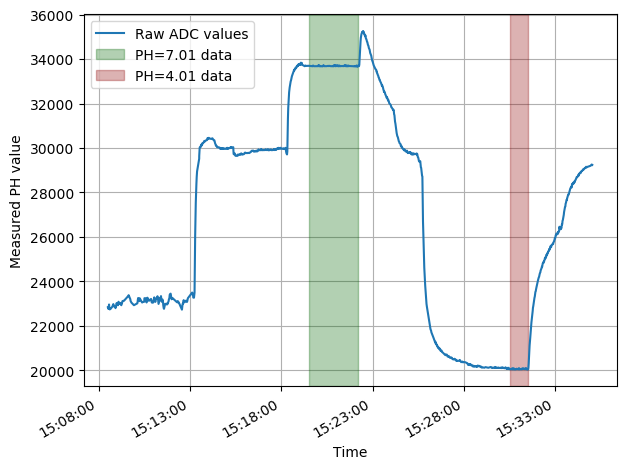

In [3]:
ph7Range = ( dt(2017, 8, 19, 15, 19, 30), dt(2017, 8, 19, 15, 22, 13) )
ph4Range = ( dt(2017, 8, 19, 15, 30, 30), dt(2017, 8, 19, 15, 31, 30) )
ph7Inds = [ getClDt(dts, dt) for dt in ph7Range ]
ph4Inds = [ getClDt(dts, dt) for dt in ph4Range ]
doPLot( dts, rawPhVals, label="Raw ADC values" )

# Get the mean raw values

In [4]:
rawA = mean( rawPhVals[ph7Inds] )
phA  = 7.01
rawA

33699.0

In [5]:
rawB = mean( rawPhVals[ph4Inds] )
phB  = 4.01
rawB

20049.5

# Calculate slope and offset correction

In [6]:
m = (phA - phB) / (rawA - rawB)
o = phA - rawA*m
print( m, o )
corVals = rawPhVals * m + o

0.000219788270633 -0.396644932049


# Verify the calibration values

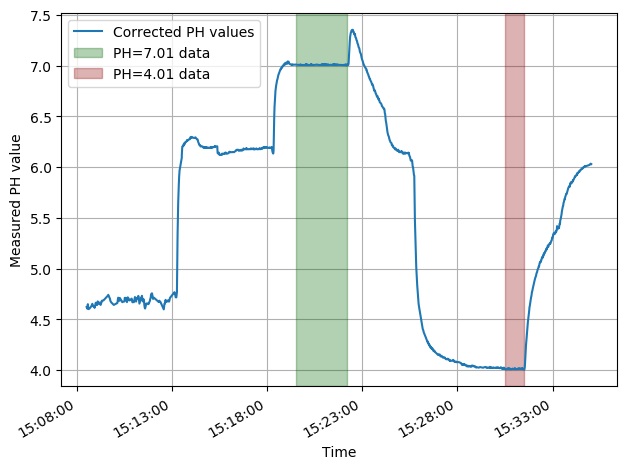

In [7]:
fig = doPLot(dts, corVals, label="Corrected PH values")
fig.savefig("phCal.png")
fig